# Data Aquisition

In [1]:
from tdmclient import ClientAsync
client = ClientAsync()
node = await client.wait_for_node()
await node.lock()

Node 4831bb7f-ee1c-4555-89c5-7d093d9f4fa5

In [2]:
from threading import Timer

class RepeatedTimer(object):
    def __init__(self, interval, function, *args, **kwargs):
        self._timer     = None
        self.interval   = interval
        self.function   = function
        self.args       = args
        self.kwargs     = kwargs
        self.is_running = False
        self.start()

    def _run(self):
        self.is_running = False
        self.start()
        self.function(*self.args, **self.kwargs)

    def start(self):
        if not self.is_running:
            self._timer = Timer(self.interval, self._run)
            self._timer.start()
            self.is_running = True

    def stop(self):
        self._timer.cancel()
        self.is_running = False

In [6]:
acquire_data = True
Ts = 0.1
thymio_data = []

def motors(left, right):
    return {
        "motor.left.target": [left],
        "motor.right.target": [right],
    }

def get_data():
    thymio_data.append({"left_speed":node["motor.left.speed"],
                        "right_speed":node["motor.right.speed"]})
    

if acquire_data:
    await node.wait_for_variables() # wait for Thymio variables values
    rt = RepeatedTimer(Ts, get_data) # it auto-starts, no need of rt.start()

    try:
        # time.sleep would not work here, use asynchronous client.sleep method instead
        await client.sleep(5)
        #node.send_set_variables(motors(50, 50))        
        # await client.sleep(15)
        node.send_set_variables(motors(45, 55))
        await client.sleep(20)
    finally:
        rt.stop() # better in a try/finally block to make sure the program ends!
        node.send_set_variables(motors(0, 0))

## Python implementation 

In [4]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np
from tqdm import tqdm

In [7]:
print(thymio_data)

[{'left_speed': -8, 'right_speed': 0}, {'left_speed': -4, 'right_speed': 0}, {'left_speed': -5, 'right_speed': 0}, {'left_speed': -6, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': -8, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': -7, 'right_speed': 0}, {'left_speed': -4, 'right_speed': 0}, {'left_speed': -5, 'right_speed': 0}, {'left_speed': -6, 'right_speed': 0}, {'left_speed': -5, 'right_speed': 0}, {'left_speed': -6, 'right_speed': 0}, {'left_speed': -5, 'right_speed': 0}, {'left_speed': -6, 'right_speed': 0}, {'left_speed': -4, 'right_speed': 0}, {'left_speed': -4, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': -6, 'right_speed': 0}, {'left_speed': -4, 'right_speed': 0}, {'left_speed': -1, 'right_speed': 0}, {'left_speed': -4, 'right_speed': 0}, {'left_speed': -2, 'right_speed': 0}, {'left_speed': -5, 'right_speed': 0}, {'left_speed': -3, 'right_speed': 0}, {'left_speed': -7, 'right_speed': 0}, {'left_speed':

In [8]:
thymio_data_straight=[{'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': -3, 'right_speed': 0}, {'left_speed': -4, 'right_speed': 0}, {'left_speed': -4, 'right_speed': 0}, {'left_speed': -9, 'right_speed': 0}, {'left_speed': -3, 'right_speed': 0}, {'left_speed': -4, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': -3, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': -3, 'right_speed': 0}, {'left_speed': -7, 'right_speed': 0}, {'left_speed': 1, 'right_speed': 0}, {'left_speed': -4, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': -5, 'right_speed': 0}, {'left_speed': -6, 'right_speed': 0}, {'left_speed': -5, 'right_speed': 0}, {'left_speed': -5, 'right_speed': 0}, {'left_speed': -3, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': -5, 'right_speed': 0}, {'left_speed': -5, 'right_speed': 0}, {'left_speed': -2, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': -5, 'right_speed': 0}, {'left_speed': 1, 'right_speed': 0}, {'left_speed': -3, 'right_speed': 0}, {'left_speed': 29, 'right_speed': 29}, {'left_speed': 39, 'right_speed': 38}, {'left_speed': 47, 'right_speed': 48}, {'left_speed': 44, 'right_speed': 49}, {'left_speed': 54, 'right_speed': 46}, {'left_speed': 48, 'right_speed': 44}, {'left_speed': 51, 'right_speed': 54}, {'left_speed': 44, 'right_speed': 49}, {'left_speed': 51, 'right_speed': 48}, {'left_speed': 53, 'right_speed': 48}, {'left_speed': 53, 'right_speed': 49}, {'left_speed': 52, 'right_speed': 48}, {'left_speed': 45, 'right_speed': 48}, {'left_speed': 42, 'right_speed': 47}, {'left_speed': 52, 'right_speed': 49}, {'left_speed': 50, 'right_speed': 49}, {'left_speed': 50, 'right_speed': 49}, {'left_speed': 45, 'right_speed': 49}, {'left_speed': 48, 'right_speed': 49}, {'left_speed': 48, 'right_speed': 49}, {'left_speed': 50, 'right_speed': 51}, {'left_speed': 47, 'right_speed': 50}, {'left_speed': 47, 'right_speed': 50}, {'left_speed': 46, 'right_speed': 49}, {'left_speed': 47, 'right_speed': 50}, {'left_speed': 54, 'right_speed': 52}, {'left_speed': 53, 'right_speed': 52}, {'left_speed': 57, 'right_speed': 50}, {'left_speed': 50, 'right_speed': 48}, {'left_speed': 53, 'right_speed': 50}, {'left_speed': 56, 'right_speed': 49}, {'left_speed': 50, 'right_speed': 50}, {'left_speed': 50, 'right_speed': 50}, {'left_speed': 48, 'right_speed': 48}, {'left_speed': 46, 'right_speed': 48}, {'left_speed': 44, 'right_speed': 48}, {'left_speed': 50, 'right_speed': 48}, {'left_speed': 49, 'right_speed': 49}, {'left_speed': 48, 'right_speed': 47}, {'left_speed': 51, 'right_speed': 50}, {'left_speed': 45, 'right_speed': 50}, {'left_speed': 51, 'right_speed': 50}, {'left_speed': 49, 'right_speed': 50}, {'left_speed': 48, 'right_speed': 51}, {'left_speed': 47, 'right_speed': 51}, {'left_speed': 53, 'right_speed': 50}, {'left_speed': 55, 'right_speed': 49}, {'left_speed': 54, 'right_speed': 49}, {'left_speed': 47, 'right_speed': 50}, {'left_speed': 46, 'right_speed': 50}, {'left_speed': 44, 'right_speed': 51}, {'left_speed': 43, 'right_speed': 51}, {'left_speed': 44, 'right_speed': 51}, {'left_speed': 50, 'right_speed': 48}, {'left_speed': 49, 'right_speed': 49}, {'left_speed': 50, 'right_speed': 47}, {'left_speed': 56, 'right_speed': 49}, {'left_speed': 54, 'right_speed': 49}, {'left_speed': 49, 'right_speed': 48}, {'left_speed': 45, 'right_speed': 46}, {'left_speed': 47, 'right_speed': 47}, {'left_speed': 44, 'right_speed': 49}, {'left_speed': 46, 'right_speed': 49}, {'left_speed': 46, 'right_speed': 50}, {'left_speed': 50, 'right_speed': 49}, {'left_speed': 49, 'right_speed': 50}, {'left_speed': 55, 'right_speed': 52}, {'left_speed': 54, 'right_speed': 52}, {'left_speed': 48, 'right_speed': 52}, {'left_speed': 47, 'right_speed': 50}, {'left_speed': 46, 'right_speed': 51}, {'left_speed': 50, 'right_speed': 50}, {'left_speed': 50, 'right_speed': 50}, {'left_speed': 50, 'right_speed': 50}, {'left_speed': 52, 'right_speed': 49}, {'left_speed': 52, 'right_speed': 49}, {'left_speed': 54, 'right_speed': 50}, {'left_speed': 53, 'right_speed': 50}, {'left_speed': 56, 'right_speed': 50}, {'left_speed': 49, 'right_speed': 49}, {'left_speed': 45, 'right_speed': 48}, {'left_speed': 45, 'right_speed': 47}, {'left_speed': 50, 'right_speed': 49}, {'left_speed': 55, 'right_speed': 49}, {'left_speed': 54, 'right_speed': 50}, {'left_speed': 51, 'right_speed': 50}, {'left_speed': 44, 'right_speed': 47}, {'left_speed': 44, 'right_speed': 49}, {'left_speed': 50, 'right_speed': 50}, {'left_speed': 48, 'right_speed': 50}, {'left_speed': 50, 'right_speed': 49}, {'left_speed': 53, 'right_speed': 51}, {'left_speed': 53, 'right_speed': 51}, {'left_speed': 52, 'right_speed': 51}, {'left_speed': 50, 'right_speed': 51}, {'left_speed': 44, 'right_speed': 51}, {'left_speed': 51, 'right_speed': 49}, {'left_speed': 54, 'right_speed': 48}, {'left_speed': 55, 'right_speed': 49}, {'left_speed': 54, 'right_speed': 48}, {'left_speed': 52, 'right_speed': 48}, {'left_speed': 45, 'right_speed': 48}, {'left_speed': 46, 'right_speed': 49}, {'left_speed': 43, 'right_speed': 49}, {'left_speed': 44, 'right_speed': 48}, {'left_speed': 43, 'right_speed': 49}, {'left_speed': 49, 'right_speed': 50}, {'left_speed': 43, 'right_speed': 50}, {'left_speed': 50, 'right_speed': 51}, {'left_speed': 54, 'right_speed': 51}, {'left_speed': 56, 'right_speed': 51}, {'left_speed': 54, 'right_speed': 51}, {'left_speed': 46, 'right_speed': 52}, {'left_speed': 43, 'right_speed': 49}, {'left_speed': 47, 'right_speed': 49}, {'left_speed': 47, 'right_speed': 49}, {'left_speed': 51, 'right_speed': 49}, {'left_speed': 53, 'right_speed': 50}, {'left_speed': 53, 'right_speed': 49}, {'left_speed': 55, 'right_speed': 49}, {'left_speed': 51, 'right_speed': 48}, {'left_speed': 44, 'right_speed': 48}, {'left_speed': 44, 'right_speed': 49}, {'left_speed': 46, 'right_speed': 50}, {'left_speed': 43, 'right_speed': 49}, {'left_speed': 47, 'right_speed': 48}, {'left_speed': 52, 'right_speed': 49}, {'left_speed': 51, 'right_speed': 49}, {'left_speed': 43, 'right_speed': 49}, {'left_speed': 43, 'right_speed': 51}, {'left_speed': 42, 'right_speed': 51}, {'left_speed': 56, 'right_speed': 51}, {'left_speed': 50, 'right_speed': 50}, {'left_speed': 52, 'right_speed': 51}, {'left_speed': 55, 'right_speed': 52}, {'left_speed': 49, 'right_speed': 51}, {'left_speed': 50, 'right_speed': 51}, {'left_speed': 53, 'right_speed': 50}, {'left_speed': 54, 'right_speed': 48}, {'left_speed': 55, 'right_speed': 48}, {'left_speed': 51, 'right_speed': 50}, {'left_speed': 49, 'right_speed': 49}, {'left_speed': 49, 'right_speed': 48}, {'left_speed': 51, 'right_speed': 49}, {'left_speed': 48, 'right_speed': 48}, {'left_speed': 51, 'right_speed': 48}, {'left_speed': 56, 'right_speed': 48}, {'left_speed': 51, 'right_speed': 51}, {'left_speed': 47, 'right_speed': 50}, {'left_speed': 46, 'right_speed': 50}, {'left_speed': 46, 'right_speed': 48}, {'left_speed': 46, 'right_speed': 49}, {'left_speed': 45, 'right_speed': 50}, {'left_speed': 45, 'right_speed': 51}, {'left_speed': 45, 'right_speed': 51}, {'left_speed': 50, 'right_speed': 52}, {'left_speed': 47, 'right_speed': 51}, {'left_speed': 48, 'right_speed': 49}, {'left_speed': 45, 'right_speed': 47}, {'left_speed': 46, 'right_speed': 50}, {'left_speed': 50, 'right_speed': 50}, {'left_speed': 52, 'right_speed': 51}, {'left_speed': 54, 'right_speed': 52}, {'left_speed': 52, 'right_speed': 49}, {'left_speed': 53, 'right_speed': 50}, {'left_speed': 45, 'right_speed': 47}, {'left_speed': 45, 'right_speed': 45}, {'left_speed': 47, 'right_speed': 47}, {'left_speed': 48, 'right_speed': 49}, {'left_speed': 57, 'right_speed': 51}, {'left_speed': 50, 'right_speed': 50}, {'left_speed': 47, 'right_speed': 49}, {'left_speed': 45, 'right_speed': 47}, {'left_speed': 45, 'right_speed': 50}, {'left_speed': 45, 'right_speed': 50}, {'left_speed': 46, 'right_speed': 51}, {'left_speed': 52, 'right_speed': 49}, {'left_speed': 52, 'right_speed': 49}, {'left_speed': 49, 'right_speed': 49}, {'left_speed': 46, 'right_speed': 49}, {'left_speed': 47, 'right_speed': 53}, {'left_speed': 49, 'right_speed': 50}, {'left_speed': 49, 'right_speed': 49}, {'left_speed': 47, 'right_speed': 47}, {'left_speed': 45, 'right_speed': 47}, {'left_speed': 46, 'right_speed': 49}, {'left_speed': 52, 'right_speed': 52}, {'left_speed': 54, 'right_speed': 51}, {'left_speed': 50, 'right_speed': 47}, {'left_speed': 47, 'right_speed': 45}, {'left_speed': 46, 'right_speed': 48}, {'left_speed': 46, 'right_speed': 49}, {'left_speed': 47, 'right_speed': 50}, {'left_speed': 50, 'right_speed': 50}]
thymio_data_curve =[{'left_speed': -8, 'right_speed': 0}, {'left_speed': -4, 'right_speed': 0}, {'left_speed': -5, 'right_speed': 0}, {'left_speed': -6, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': -8, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': -7, 'right_speed': 0}, {'left_speed': -4, 'right_speed': 0}, {'left_speed': -5, 'right_speed': 0}, {'left_speed': -6, 'right_speed': 0}, {'left_speed': -5, 'right_speed': 0}, {'left_speed': -6, 'right_speed': 0}, {'left_speed': -5, 'right_speed': 0}, {'left_speed': -6, 'right_speed': 0}, {'left_speed': -4, 'right_speed': 0}, {'left_speed': -4, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': -6, 'right_speed': 0}, {'left_speed': -4, 'right_speed': 0}, {'left_speed': -1, 'right_speed': 0}, {'left_speed': -4, 'right_speed': 0}, {'left_speed': -2, 'right_speed': 0}, {'left_speed': -5, 'right_speed': 0}, {'left_speed': -3, 'right_speed': 0}, {'left_speed': -7, 'right_speed': 0}, {'left_speed': -5, 'right_speed': 0}, {'left_speed': -5, 'right_speed': 0}, {'left_speed': -8, 'right_speed': 0}, {'left_speed': -2, 'right_speed': 0}, {'left_speed': -6, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': -5, 'right_speed': 0}, {'left_speed': -1, 'right_speed': 0}, {'left_speed': -3, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': -3, 'right_speed': 0}, {'left_speed': -3, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': -4, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': -3, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 31, 'right_speed': 37}, {'left_speed': 34, 'right_speed': 43}, {'left_speed': 39, 'right_speed': 51}, {'left_speed': 41, 'right_speed': 54}, {'left_speed': 42, 'right_speed': 51}, {'left_speed': 43, 'right_speed': 57}, {'left_speed': 42, 'right_speed': 56}, {'left_speed': 42, 'right_speed': 58}, {'left_speed': 43, 'right_speed': 62}, {'left_speed': 42, 'right_speed': 59}, {'left_speed': 43, 'right_speed': 58}, {'left_speed': 46, 'right_speed': 56}, {'left_speed': 47, 'right_speed': 55}, {'left_speed': 45, 'right_speed': 48}, {'left_speed': 50, 'right_speed': 46}, {'left_speed': 46, 'right_speed': 47}, {'left_speed': 43, 'right_speed': 47}, {'left_speed': 43, 'right_speed': 47}, {'left_speed': 42, 'right_speed': 50}, {'left_speed': 43, 'right_speed': 52}, {'left_speed': 43, 'right_speed': 51}, {'left_speed': 44, 'right_speed': 51}, {'left_speed': 46, 'right_speed': 53}, {'left_speed': 46, 'right_speed': 54}, {'left_speed': 45, 'right_speed': 55}, {'left_speed': 47, 'right_speed': 60}, {'left_speed': 44, 'right_speed': 61}, {'left_speed': 44, 'right_speed': 61}, {'left_speed': 43, 'right_speed': 63}, {'left_speed': 42, 'right_speed': 63}, {'left_speed': 43, 'right_speed': 56}, {'left_speed': 42, 'right_speed': 54}, {'left_speed': 45, 'right_speed': 53}, {'left_speed': 46, 'right_speed': 52}, {'left_speed': 46, 'right_speed': 52}, {'left_speed': 48, 'right_speed': 49}, {'left_speed': 47, 'right_speed': 46}, {'left_speed': 45, 'right_speed': 46}, {'left_speed': 46, 'right_speed': 48}, {'left_speed': 44, 'right_speed': 49}, {'left_speed': 44, 'right_speed': 51}, {'left_speed': 42, 'right_speed': 53}, {'left_speed': 42, 'right_speed': 57}, {'left_speed': 42, 'right_speed': 61}, {'left_speed': 44, 'right_speed': 63}, {'left_speed': 47, 'right_speed': 63}, {'left_speed': 46, 'right_speed': 62}, {'left_speed': 46, 'right_speed': 62}, {'left_speed': 50, 'right_speed': 61}, {'left_speed': 48, 'right_speed': 62}, {'left_speed': 42, 'right_speed': 58}, {'left_speed': 42, 'right_speed': 56}, {'left_speed': 44, 'right_speed': 55}, {'left_speed': 45, 'right_speed': 49}, {'left_speed': 45, 'right_speed': 49}, {'left_speed': 46, 'right_speed': 51}, {'left_speed': 50, 'right_speed': 49}, {'left_speed': 50, 'right_speed': 49}, {'left_speed': 46, 'right_speed': 48}, {'left_speed': 48, 'right_speed': 49}, {'left_speed': 45, 'right_speed': 50}, {'left_speed': 43, 'right_speed': 50}, {'left_speed': 41, 'right_speed': 51}, {'left_speed': 43, 'right_speed': 60}, {'left_speed': 42, 'right_speed': 60}, {'left_speed': 44, 'right_speed': 59}, {'left_speed': 42, 'right_speed': 64}, {'left_speed': 44, 'right_speed': 63}, {'left_speed': 45, 'right_speed': 62}, {'left_speed': 46, 'right_speed': 55}, {'left_speed': 44, 'right_speed': 52}, {'left_speed': 43, 'right_speed': 50}, {'left_speed': 43, 'right_speed': 50}, {'left_speed': 42, 'right_speed': 50}, {'left_speed': 43, 'right_speed': 48}, {'left_speed': 44, 'right_speed': 49}, {'left_speed': 47, 'right_speed': 47}, {'left_speed': 47, 'right_speed': 49}, {'left_speed': 43, 'right_speed': 52}, {'left_speed': 42, 'right_speed': 53}, {'left_speed': 43, 'right_speed': 57}, {'left_speed': 42, 'right_speed': 57}, {'left_speed': 44, 'right_speed': 59}, {'left_speed': 42, 'right_speed': 57}, {'left_speed': 44, 'right_speed': 54}, {'left_speed': 50, 'right_speed': 58}, {'left_speed': 50, 'right_speed': 58}, {'left_speed': 47, 'right_speed': 58}, {'left_speed': 48, 'right_speed': 60}, {'left_speed': 45, 'right_speed': 63}, {'left_speed': 42, 'right_speed': 63}, {'left_speed': 42, 'right_speed': 61}, {'left_speed': 42, 'right_speed': 57}, {'left_speed': 44, 'right_speed': 61}, {'left_speed': 46, 'right_speed': 60}, {'left_speed': 50, 'right_speed': 62}, {'left_speed': 47, 'right_speed': 52}, {'left_speed': 49, 'right_speed': 53}, {'left_speed': 48, 'right_speed': 53}, {'left_speed': 44, 'right_speed': 47}, {'left_speed': 42, 'right_speed': 47}, {'left_speed': 42, 'right_speed': 47}, {'left_speed': 44, 'right_speed': 47}, {'left_speed': 46, 'right_speed': 48}, {'left_speed': 46, 'right_speed': 50}, {'left_speed': 47, 'right_speed': 57}, {'left_speed': 45, 'right_speed': 59}, {'left_speed': 42, 'right_speed': 61}, {'left_speed': 43, 'right_speed': 62}, {'left_speed': 42, 'right_speed': 63}, {'left_speed': 44, 'right_speed': 64}, {'left_speed': 44, 'right_speed': 64}, {'left_speed': 49, 'right_speed': 61}, {'left_speed': 46, 'right_speed': 59}, {'left_speed': 48, 'right_speed': 55}, {'left_speed': 48, 'right_speed': 55}, {'left_speed': 46, 'right_speed': 54}, {'left_speed': 46, 'right_speed': 54}, {'left_speed': 43, 'right_speed': 54}, {'left_speed': 43, 'right_speed': 54}, {'left_speed': 43, 'right_speed': 50}, {'left_speed': 42, 'right_speed': 46}, {'left_speed': 42, 'right_speed': 44}, {'left_speed': 47, 'right_speed': 46}, {'left_speed': 46, 'right_speed': 46}, {'left_speed': 45, 'right_speed': 48}, {'left_speed': 46, 'right_speed': 48}, {'left_speed': 45, 'right_speed': 48}, {'left_speed': 43, 'right_speed': 49}, {'left_speed': 44, 'right_speed': 56}, {'left_speed': 43, 'right_speed': 57}, {'left_speed': 43, 'right_speed': 60}, {'left_speed': 42, 'right_speed': 60}, {'left_speed': 43, 'right_speed': 60}, {'left_speed': 45, 'right_speed': 63}, {'left_speed': 44, 'right_speed': 62}, {'left_speed': 45, 'right_speed': 61}, {'left_speed': 45, 'right_speed': 57}, {'left_speed': 47, 'right_speed': 54}, {'left_speed': 48, 'right_speed': 51}, {'left_speed': 45, 'right_speed': 52}, {'left_speed': 44, 'right_speed': 50}, {'left_speed': 46, 'right_speed': 47}, {'left_speed': 43, 'right_speed': 46}, {'left_speed': 42, 'right_speed': 46}, {'left_speed': 43, 'right_speed': 48}, {'left_speed': 42, 'right_speed': 47}, {'left_speed': 44, 'right_speed': 49}, {'left_speed': 48, 'right_speed': 51}, {'left_speed': 46, 'right_speed': 51}, {'left_speed': 44, 'right_speed': 53}, {'left_speed': 46, 'right_speed': 55}, {'left_speed': 46, 'right_speed': 55}, {'left_speed': 44, 'right_speed': 59}, {'left_speed': 42, 'right_speed': 62}, {'left_speed': 43, 'right_speed': 64}, {'left_speed': 42, 'right_speed': 60}, {'left_speed': 42, 'right_speed': 58}, {'left_speed': 41, 'right_speed': 52}, {'left_speed': 44, 'right_speed': 50}, {'left_speed': 44, 'right_speed': 48}, {'left_speed': 47, 'right_speed': 49}, {'left_speed': 47, 'right_speed': 51}, {'left_speed': 45, 'right_speed': 51}, {'left_speed': 47, 'right_speed': 52}, {'left_speed': 44, 'right_speed': 54}, {'left_speed': 43, 'right_speed': 55}, {'left_speed': 43, 'right_speed': 59}, {'left_speed': 43, 'right_speed': 60}, {'left_speed': 44, 'right_speed': 59}, {'left_speed': 48, 'right_speed': 57}, {'left_speed': 47, 'right_speed': 55}, {'left_speed': 52, 'right_speed': 57}, {'left_speed': 43, 'right_speed': 55}, {'left_speed': 45, 'right_speed': 51}, {'left_speed': 42, 'right_speed': 48}, {'left_speed': 42, 'right_speed': 50}, {'left_speed': 44, 'right_speed': 51}, {'left_speed': 42, 'right_speed': 56}, {'left_speed': 51, 'right_speed': 59}, {'left_speed': 49, 'right_speed': 56}, {'left_speed': 43, 'right_speed': 57}, {'left_speed': 44, 'right_speed': 55}, {'left_speed': 43, 'right_speed': 52}, {'left_speed': 44, 'right_speed': 48}, {'left_speed': 51, 'right_speed': 47}, {'left_speed': 46, 'right_speed': 44}, {'left_speed': 44, 'right_speed': 44}, {'left_speed': 42, 'right_speed': 45}, {'left_speed': 42, 'right_speed': 46}, {'left_speed': 44, 'right_speed': 45}, {'left_speed': 44, 'right_speed': 46}]

**2 experiments :**
- Straight : the robot go forward. Used to compute the conversion faction thymio_speed_to_mms
- Curve : used to compute the different Covariances 

In [15]:
Ts=0.1

mode="STRAIGHT" # mode = SRAIGHT or CURVE

if mode=="SRAIGHT":
    thymio_data=thymio_data_straight
elif mode=="CURVE":
    thymio_data=thymio_data_curve

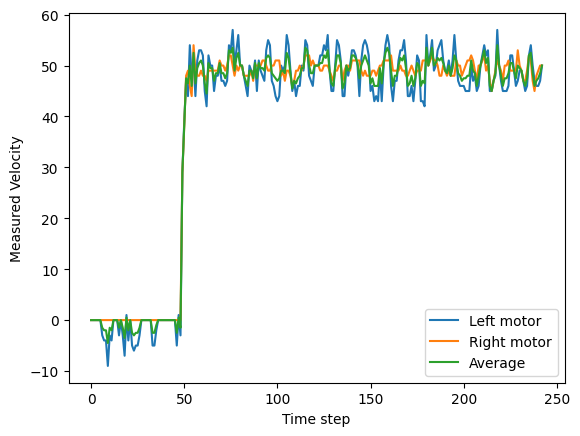

In [16]:
l_speed = [x["left_speed"] for x in thymio_data]
r_speed = [x["right_speed"] for x in thymio_data]
avg_speed = [(x["left_speed"]+x["right_speed"])/2 for x in thymio_data]
difference_speed=[x["left_speed"]-x["right_speed"] for x in thymio_data]
plt.plot(l_speed, label="Left motor")
plt.plot(r_speed, label="Right motor")
plt.plot(avg_speed, label="Average")
plt.xlabel("Time step")
plt.ylabel("Measured Velocity")
plt.legend()

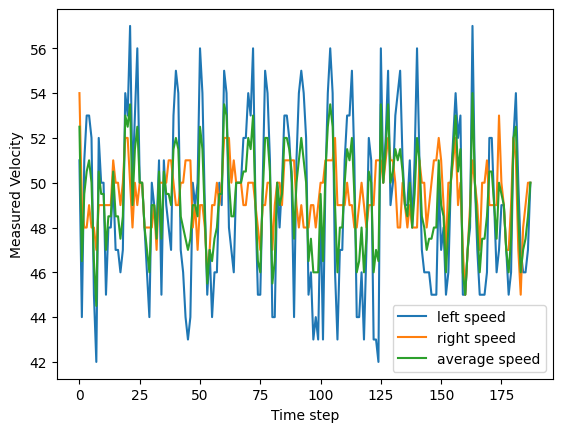

In [11]:
plt.plot(l_speed[55:], label="left speed")
plt.plot(r_speed[55:], label="right speed")
plt.plot(avg_speed[55:], label="average speed")
plt.xlabel("Time step")
plt.ylabel("Measured Velocity")
plt.legend()

Computation of conversion factor :

In [17]:
mode="STRAIGHT" 
if mode=="STRAIGHT":
    thymio_mms_speed=365/(Ts*len(avg_speed[55:])) # measured distance of 28.6 cm

    print("The Thymio's speed in mm/s is {}".format(thymio_mms_speed))

    #thymio was given a command of 50 so 
    thymio_speed_to_mms = thymio_mms_speed/50
    print("To go from Thymio speed to mm/s, the conversion factor is {}".format(thymio_speed_to_mms))


The Thymio's speed in mm/s is 19.414893617021274
To go from Thymio speed to mm/s, the conversion factor is 0.3882978723404255


Computation of covariances:

In [18]:
#thymio was given a command of 50 so 
thymio_speed_to_mms = 0.388
#comme exo8
var_speed = np.var(np.array(avg_speed[55:])*thymio_speed_to_mms) # took from 55 to avoid the initial transient and devid by the conversion factor
std_speed = np.std(np.array(avg_speed[55:])*thymio_speed_to_mms)
print("The speed variance in mm^2/s^2 is {}".format(var_speed))

The speed variance in mm^2/s^2 is 0.6772307709370758


In [19]:
#assuming that half of variance is caused by measurement and half by perturbation of state we have

q_nu_v = var_speed/2 # variance on speed state
r_nu_v = var_speed/2 # variance on speed measurement
#print the values with float of 2 decimals
print("The speed state variance in mm^2/s^2 is {:.2f}".format(q_nu_v))
print("The speed measurement variance in mm^2/s^2 is {:.2f}".format(r_nu_v))

The speed state variance in mm^2/s^2 is 0.34
The speed measurement variance in mm^2/s^2 is 0.34


In [20]:
L= 95 # distance between the 2 wheels in mm
omega=np.array(difference_speed[55:])*thymio_speed_to_mms/L #rad per second

var_omega = np.var(omega) # took from 55 to avoid the initial transient and devid by the conversion factor
std_omega = np.std(omega)

q_w = var_omega/2 # variance on speed state
r_w = var_omega/2 # variance on speed measurement
#print the values with float of 2 decimals

print("The angular velocity state variance in rad^2/s^2 is {:.4f}".format(q_w))
print("The angular velocity measurement variance in rad^2/s^2 is {:.4f}".format(r_w))

The angular velocity state variance in rad^2/s^2 is 0.0001
The angular velocity measurement variance in rad^2/s^2 is 0.0001


## Covariance in x, y and yaw 

In [21]:
# Initialize pose
x, y, yaw = [0], [0], [0]  # Start at (0, 0, 0)
speed_mms=np.array(avg_speed[55:])*thymio_speed_to_mms

# Compute x, y, theta over time
for i in range(len(speed_mms)):
    x_new = x[-1] + speed_mms[i] * np.cos(yaw[-1]) * Ts
    y_new = y[-1] + speed_mms[i] * np.sin(yaw[-1]) * Ts
    theta_new = yaw[-1] + omega[i] * Ts
    
    x.append(x_new)
    y.append(y_new)
    yaw.append(theta_new)

# Remove the initial pose to compute variance on actual motion
x, y, yaw = x[1:], y[1:], yaw[1:]

expected_x,expected_y,expected_yaw=[0],[0],[0]
expected_v=(45+55)*thymio_speed_to_mms/2
expected_w=(45-55)*thymio_speed_to_mms/L

for i in range(len(speed_mms)):
    x_exp = expected_x[-1]+expected_v*np.cos(expected_yaw[-1]) * Ts
    y_exp = expected_y[-1]+expected_v*np.sin(expected_yaw[-1]) * Ts
    yaw_exp = expected_yaw[-1]+expected_w * Ts

    expected_x.append(x_exp)
    expected_y.append(y_exp)
    expected_yaw.append(yaw_exp)
    
expected_x, expected_y, expected_yaw = expected_x[1:], expected_y[1:], expected_yaw[1:]

# Compute variances
var_x = np.var(np.array(x)-np.array(expected_x))
var_y = np.var(np.array(y)-np.array(expected_y))
var_theta = np.var(np.array(yaw)-np.array(expected_yaw))



print("Variance in x (mm^2):", var_x)
print("Variance in y (mm^2):", var_y)
print("Variance in yaw (rad^2):", var_theta)

Variance in x (mm^2): 73.75283374528789
Variance in y (mm^2): 1551.0575218094712
Variance in yaw (rad^2): 0.046394021966009856
